Notebook to analyze individual results for the paper

In [1]:
import pandas as pd
import pymc as pm
import arviz as az
import cloudpickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
sns.set_style("whitegrid")

import os
os.chdir('../')

from src.plots import (
    make_stage_w_posterior_predictive_plot,
    make_linear_trace_analysis_plot,
    make_nonlinear_trace_analysis_plot
    )

from src.diffusivity import (
    calc_tilda_c, 
    linear_diffusivity, 
    within_ellipsoid, 
    calculate_lsq_diffusivities
    )

In [2]:
params = {
    'plausible_ellipsoid_lwh': [1000, 400, 600],
    'onstrike_angle_deg': 50,
}

well = 4
stage = 7

# load stage distances
stg_dist = pd.read_csv('data/ms_stage_distances.csv').query("WellID == @well").query("Stage == @stage")

# apply ellipsoid filter again
# run the plausible ellipsoid filter
stg_dist["in_frac_ellipsoid"] = within_ellipsoid(
    stg_dist[["dx_strike_m", "dy_strike_m", "dz_strike_m"]].to_numpy(),
    ellipsoid_rxryrz=params['plausible_ellipsoid_lwh']
)

In [3]:
# load results, model, and trace for linear and nonlinear models
linear_results = pd.read_parquet(f"outputs/{well}_{stage}_linear.parquet")

with open(f"outputs/{well}_{stage}_lineartrace.pkl", 'rb') as f:
    linear_trace = cloudpickle.load(f)

with open(f"outputs/{well}_{stage}_linearmodel.pkl", 'rb') as f:
    linear_model = cloudpickle.load(f)

nonlinear_results = pd.read_parquet(f"outputs/{well}_{stage}_nonlinear.parquet")

with open(f"outputs/{well}_{stage}_nonlineartrace.pkl", 'rb') as f:
    nonlinear_trace = cloudpickle.load(f)

with open(f"outputs/{well}_{stage}_nonlinearmodel.pkl", 'rb') as f:
    nonlinear_model = cloudpickle.load(f)


In [4]:
# well 4 stage 7
fig = make_stage_w_posterior_predictive_plot(stg_dist, params, well, stage, nonlinear_trace, fig_size=(12,4), title_prefix='', Do=2, samples=500)
fig.savefig(f'figures/3abc_w{well}_s{stage}_stage_w_posterior.pdf')
plt.show()

fig = make_linear_trace_analysis_plot(stg_dist, linear_model, linear_trace, samples=100)
fig.savefig('figures/4_linear_trace_analysis.pdf')
plt.show()

fig = make_nonlinear_trace_analysis_plot(stg_dist, nonlinear_model, nonlinear_trace, samples=100)
fig.savefig('figures/4_nonlinear_trace_analysis.pdf')
plt.show()

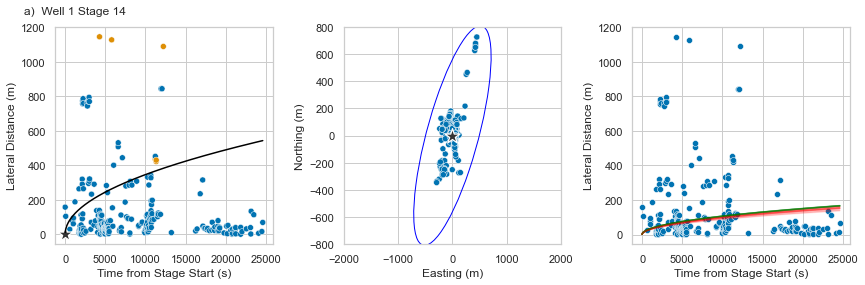

In [ ]:
# well 1, stage 14
well = 1
stage = 14
title_prefix = ''

# load stage distances
stg_dist = pd.read_csv('data/ms_stage_distances.csv').query("WellID == @well").query("Stage == @stage")

# apply ellipsoid filter again
# run the plausible ellipsoid filter
stg_dist["in_frac_ellipsoid"] = within_ellipsoid(
    stg_dist[["dx_strike_m", "dy_strike_m", "dz_strike_m"]].to_numpy(),
    ellipsoid_rxryrz=params['plausible_ellipsoid_lwh']
)

with open(f"outputs/{well}_{stage}_nonlineartrace.pkl", 'rb') as f:
    nonlinear_trace = cloudpickle.load(f)

fig = make_stage_w_posterior_predictive_plot(stg_dist, params, well, stage, nonlinear_trace, fig_size=(12,4), title_prefix=title_prefix, Do=2, samples=500)
fig.savefig(f'figures/3def_w{well}_s{stage}_stage_w_posterior.pdf')
plt.show()


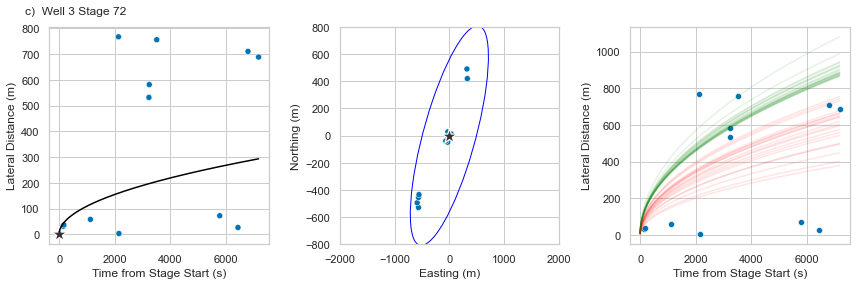

In [ ]:
# well 1, stage 14
well = 3
stage = 72
title_prefix = 'c) '

# load stage distances
stg_dist = pd.read_csv('data/ms_stage_distances.csv').query("WellID == @well").query("Stage == @stage")

# apply ellipsoid filter again
# run the plausible ellipsoid filter
stg_dist["in_frac_ellipsoid"] = within_ellipsoid(
    stg_dist[["dx_strike_m", "dy_strike_m", "dz_strike_m"]].to_numpy(),
    ellipsoid_rxryrz=params['plausible_ellipsoid_lwh']
)

with open(f"outputs/{well}_{stage}_nonlineartrace.pkl", 'rb') as f:
    nonlinear_trace = cloudpickle.load(f)

fig = make_stage_w_posterior_predictive_plot(stg_dist, params, well, stage, nonlinear_trace, fig_size=(12,4), title_prefix=title_prefix, Do=2, samples=500)
fig.savefig(f'figures/3ghi_w{well}_s{stage}_stage_w_posterior.pdf')
plt.show()